# 机器学习小组大作业
***
 <center><font color=#1E90FF size=4 face="黑体">小组成员 ：张磊 孙昊 朱鹏宇 江俊锋 罗嘉熙 吴博伟 </font></center>

## 房价预测
***
### 房价预测实验介绍
***
&emsp;&emsp;本实验主要是依据房屋的属性信息，包括房屋的卧室数量，卫生间数量，房屋的大小，房屋地下室的大小，房屋的外观，房屋的评分，房屋的修建时间，房屋的翻修时间，房屋的位置信息等，对房屋的价格进行预测，从而为此类价格类实际问题的处理提供技术参考。这本质上是一个回归问题。

### 1. 实验所用数据集
***
①本地离线数据集：kc_house_data.csv   
②本地离线待更换数据集：boston_housing_data.csv

数据详情可查阅如下网址了解：
https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv

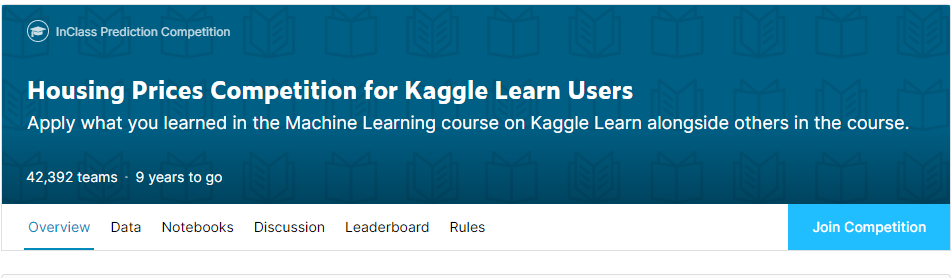

In [1]:
from IPython.display import Image
Image(filename = '.\picture\Kagg Housing Prices Data Introduce.png', width=100, height=60)

实验环境要求
* python 3.7+Anaconda虚拟环境
* pycharm+Jupyter平台

### 2. 实验总体设计
本实验遵从数据挖掘的一般流程，首先对已经下载本地的数据进行读取，常规的探索后，进行数据预处理，随后直接选择sklearn模块中的决策树、随机森林、GDBT、XGBoost算法进行建模，选择出性能突出的模型做进一步的调参优化，最终确认模型，进行预测。

### 3. 实验整体方案

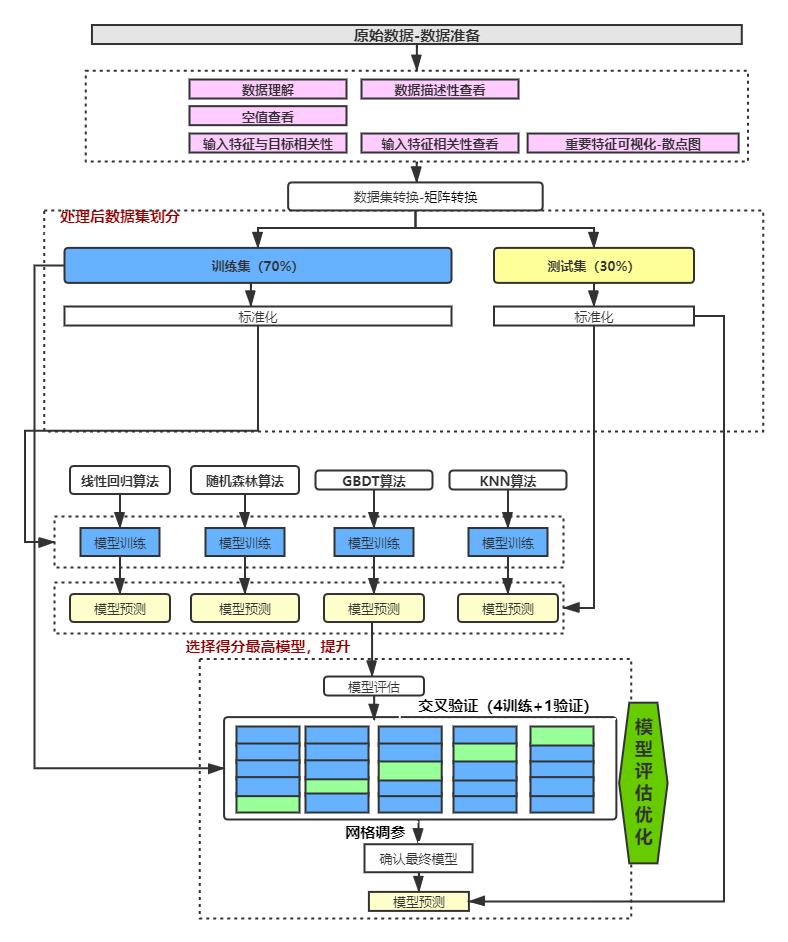

In [2]:
from IPython.display import Image
Image(filename = '.\picture\liuchengtu.png', width=100, height=60)

### 4. 实验详细设计与实现
***
#### 导入实验环境
**<font color=#DC143C>本实验使用到的框架主要包括numpy，pandas，scikit-learn，matplotlib，seaborn库。scikit-learn库是Python的机器学习库，提供一些常用的机器学习算法模型及模型参数优化功能；numpy ，pandas库是Python中结构化数据处理的库，主要用于结构化数据的统计分析及操作；matplotlib，seaborn主要用于数据分析过程的可视化展示。</font>**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
sns.set_style(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")


#### 4.1 数据准备
#### 离线数据读取
##### <font color=#DC143C>这里读取的数据是与项目文件同级目录下，或同一个文件夹中。</font>

In [4]:
df = pd.read_csv(".\data\kc_house_data.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

#### 输出前5行数据
###### <font color=#DC143C> 查看文件头信息，了解基本的数据记录，查看每条记录具体包含哪些内容。</font>

In [5]:
print(df.sample(5))

                    id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
date                                                                           
2014-05-23  8562850150  467100.0         3       1.75         1620      8645   
2014-07-15  3750603492  185000.0         3       1.00         1510     17040   
2014-09-22  6870300060  470000.0         3       2.50         2120      2374   
2015-04-27  3348401095  210000.0         4       1.75         2090      6485   
2014-10-09  7518503685  402000.0         2       1.00          710      5100   

            floors  waterfront  view  condition  grade  sqft_above  \
date                                                                 
2014-05-23     1.0           0     0          3      7        1190   
2014-07-15     1.0           0     0          4      6        1510   
2014-09-22     2.0           0     0          3      8        1770   
2015-04-27     1.0           0     0          3      7        1280   
2014-10-09     1.0 

##### 从上述输出结果中可以查看数据的前5行信息，包括id，时间，大小，楼层，住宅面积等基本房屋信息。

#### 4.2 数据理解
#### 4.2.1 输出属性信息

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21613 entries, 2014-10-13 to 2014-10-15
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  fl

##### 上述属性描述信息可以看出，所有的属性都是数值型的，记录数，和空值情况，上述信息显示所有属性都不存在空值的情况。

#### 4.2.2 输出描述信息

##### <font color=#DC143C>查看属性的统计描述信息，了解每种属性的记录数，区间范围，均值，分位值，方差，用于了解属性的分布和倾斜情况，为后续数据的分析和处理服务。</font>

In [7]:
print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

##### 上述输出属性的统计信息，主要输出记录数量，属性均值，方差，最小值，25%分位值，50%分位值，75%分位值，和最大值，可以看出每种属性的统计信息，通过对比mean值和50%值，可以看出部分属性出现略有倾斜的情况，比如sqft_living15，但是也有部分属性出现严重倾斜的情况比如sqft_lot15，倾斜情况比较严重。针对类似问题，若是存在空值情况，则需要通过众数进行缺失值的填充。数据预处理

#### 4.2.3 输出空值信息

In [8]:
print(df.isnull().any())
 #这里主要调用DataFrame中的isnull方法进行属性空值检测

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


##### 从上述结果可以看出没有出现空值现象，说明属性完整情况较好。

##### 查看属性与房价之间的分布规律，用于探索单一属性与房价的变化规律，明确房价的决定因素有哪些，或哪些属性对房价有明确的营销。

#### 4.2.4 查看每种属性与房价的分布关系

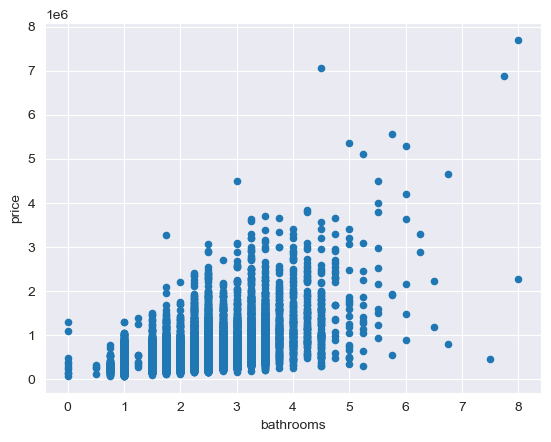

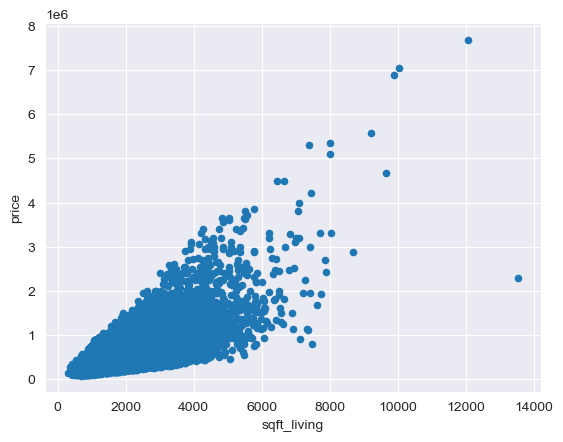

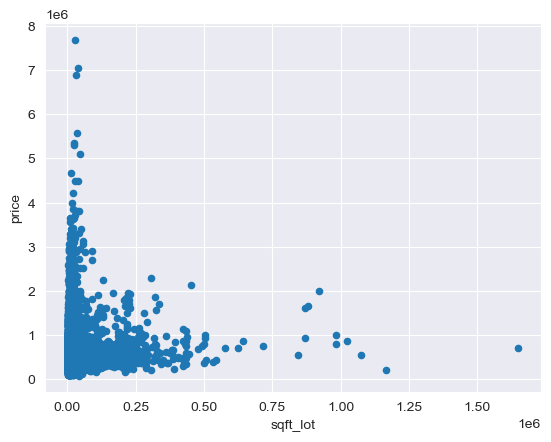

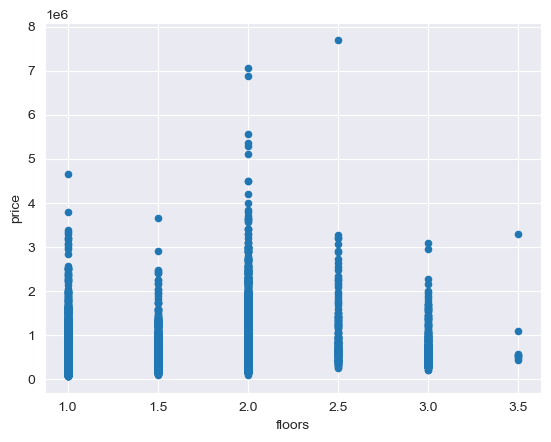

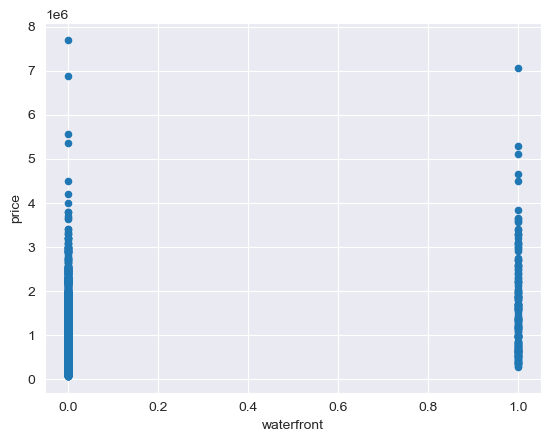

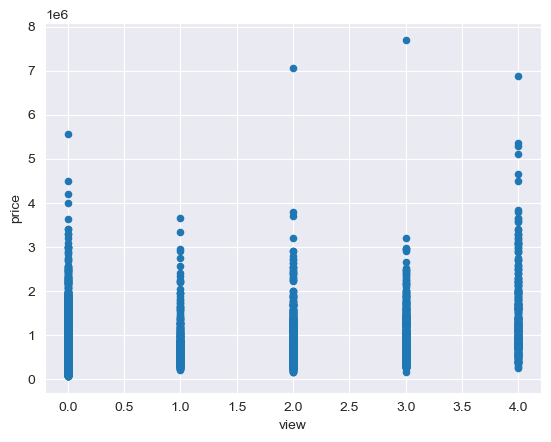

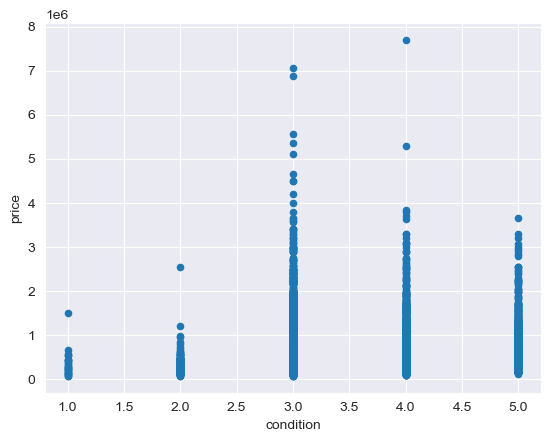

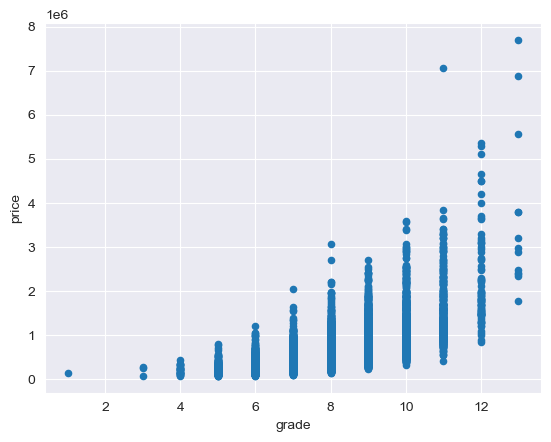

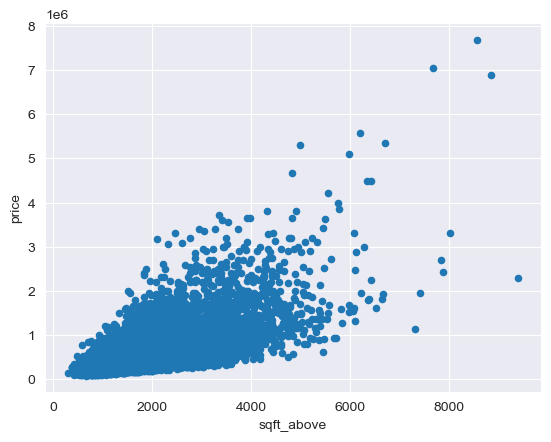

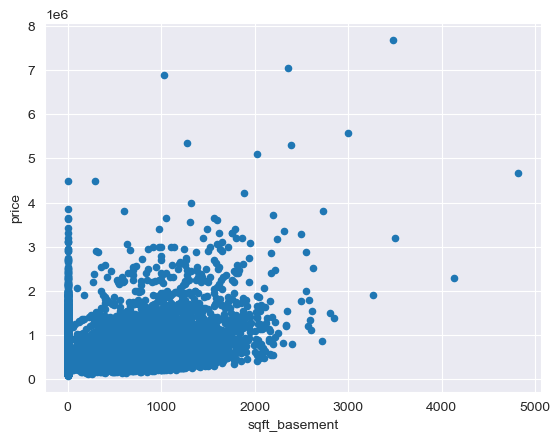

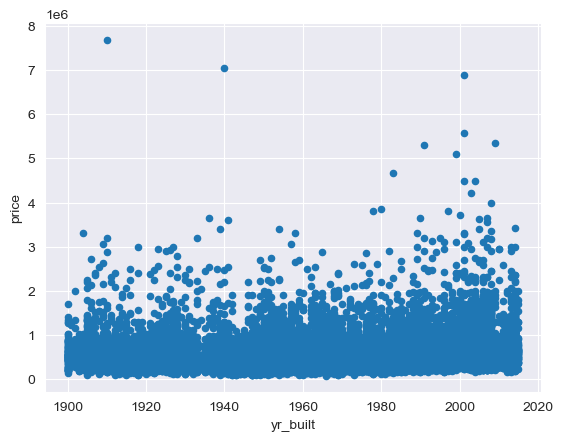

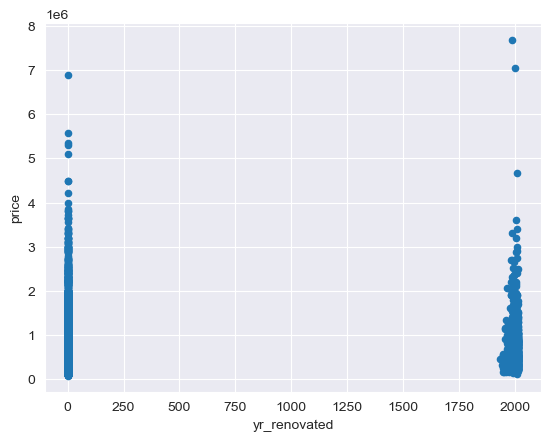

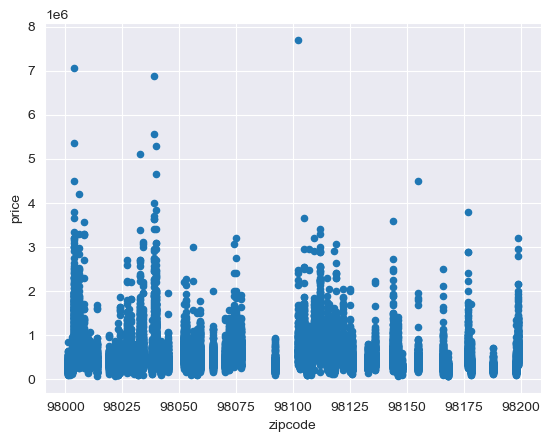

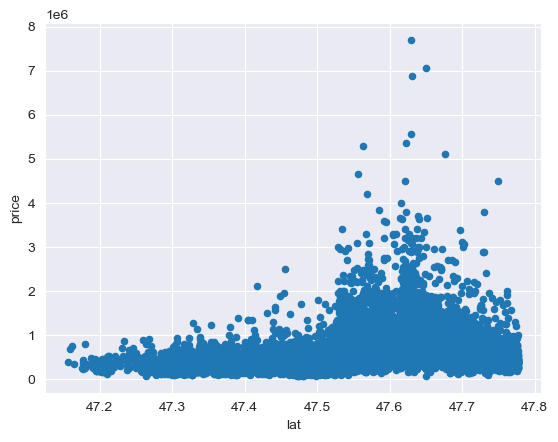

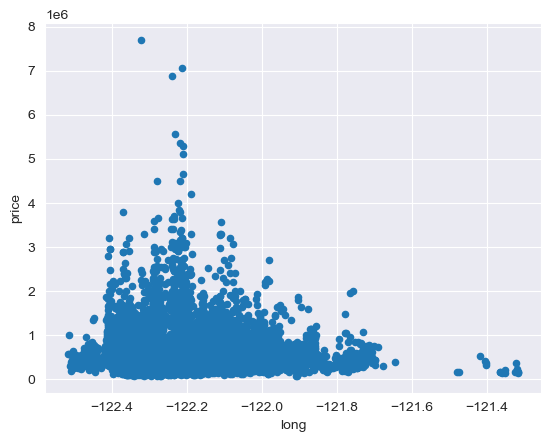

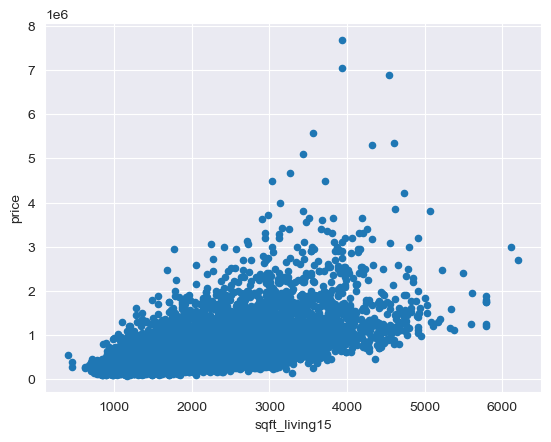

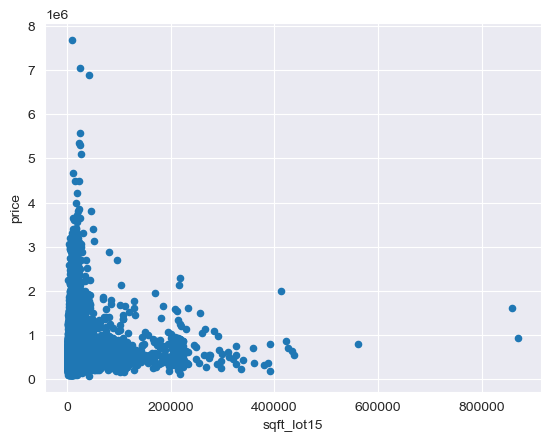

In [9]:
#获取第三列开始往后的所有属性名称，由于第一列为序号，第二列为房屋记录时间，第三列房屋价格
#因此此处从第四列开始获取属性集。
x_vars=df.columns[3:]
for x_var in x_vars:
   df.plot(kind='scatter',x=x_var,y='price')

##### 上述这些图呈现了每种属性与房价的散点分布图，从图中可以看出从上述这些图可以看出，属性的分布不服从整体分布，分布规律不明显。因此无法直接分析单个属性的变化对房价预测结果的影响，即使用简单的多元线性回归算法对房价预测的效果可能会比较差，后续需要分析属性之间的相关性，用于采用相对复杂的回归模型进行预测。

#### 4.2.5 查看属性之间的相关性

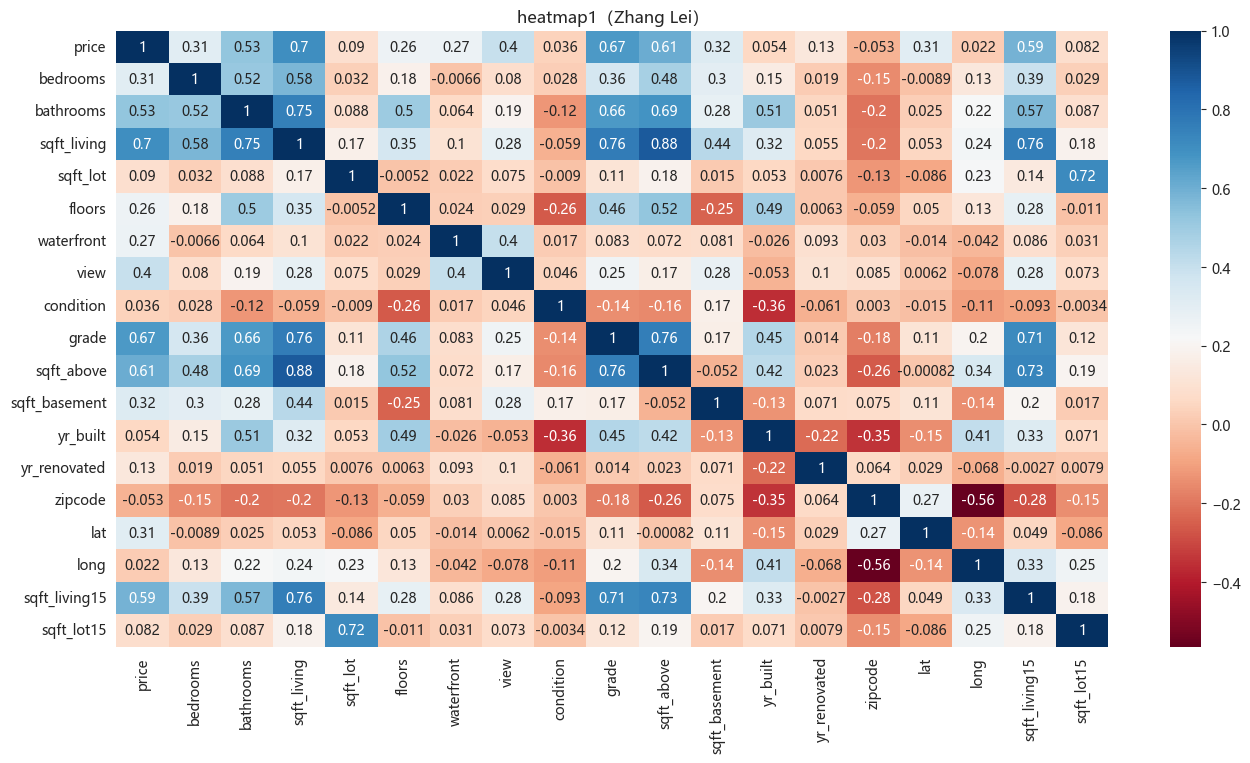

In [10]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#删除原始数据中的索引id
df.drop(["id"],axis=1,inplace=True)
#计算属性间的相关系数图
corr = df.corr()
#绘制属性相关系数的热力图
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,cmap="RdBu")
plt.title("heatmap1（Zhang Lei）")
plt.savefig('热力图1.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

##### 上图显示属性自身的相关性为1，说明任何属性与其本身之间是强相关的，而属性之间相关系数都不大，说明属性之间普遍相关性不高，但是部分属性具备相关性挖掘的可能。

#### 4.2.6 显示下三角的相关系数，用于呈现属性之间的相关系数图，简化相关系数图。

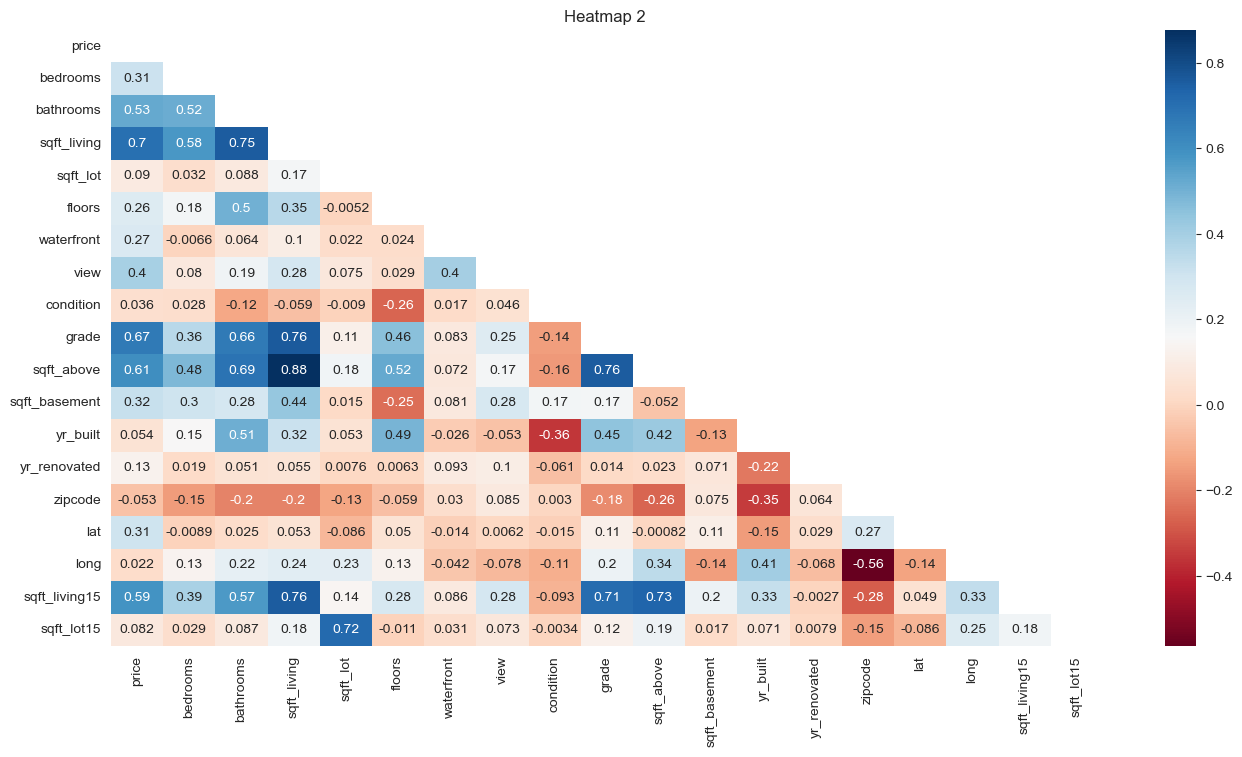

In [11]:
from pylab import *
plt.figure(figsize=(16,8))
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']

mask = np.zeros_like(corr,dtype=bool)
# Create a msk to draw only lower diagonal corr map
mask[np.triu_indices_from(mask)] = True

sns.set_style(style="white")
#对相关系数图进行下三角显示
sns.heatmap(corr,annot=True,cmap="RdBu",mask=mask)
plt.title("Heatmap 2 ")
plt.savefig('热力图2.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show ()

#### 4.2.7 查看所有房子的地理分布的散点图，查看房屋的地理分布是否存在相关的分布规律

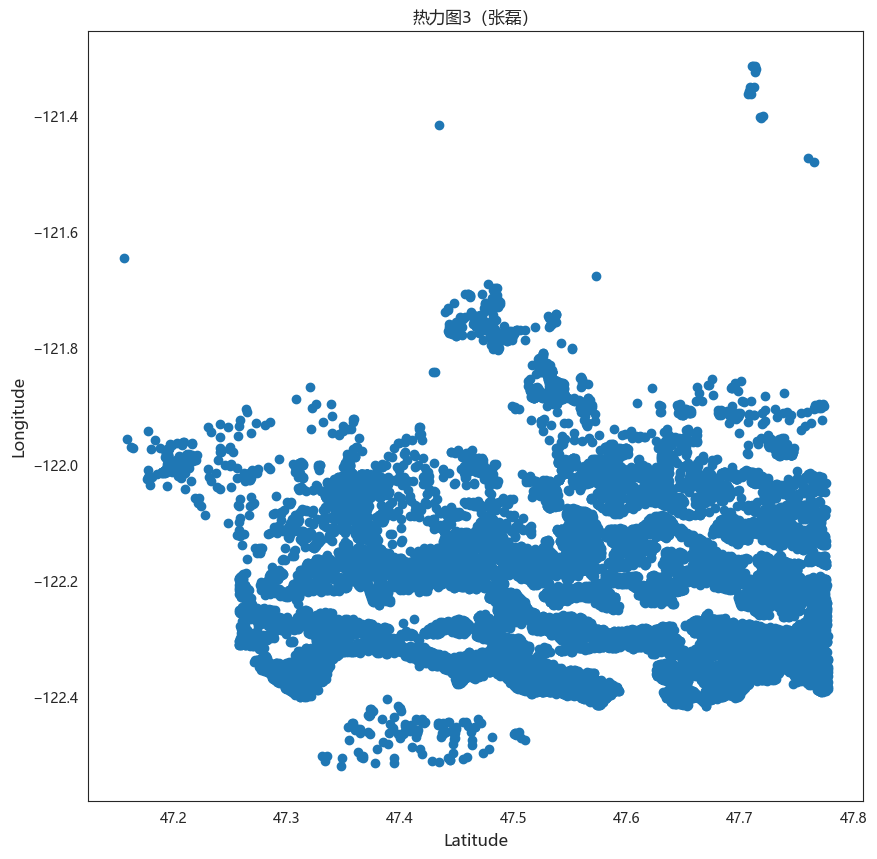

In [12]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.figure(figsize=(10,10))
#调用散点图模块，依据经纬度绘制散点图
plt.scatter(df.lat, df.long)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.title("热力图3（张磊）")
plt.savefig('热力图.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

##### 由上图可知，房屋的地理位置分布相对比较集中，但无法看到各区的房屋价格分布情况

#### 4.2.8 输出相关系数大于0.5的属性

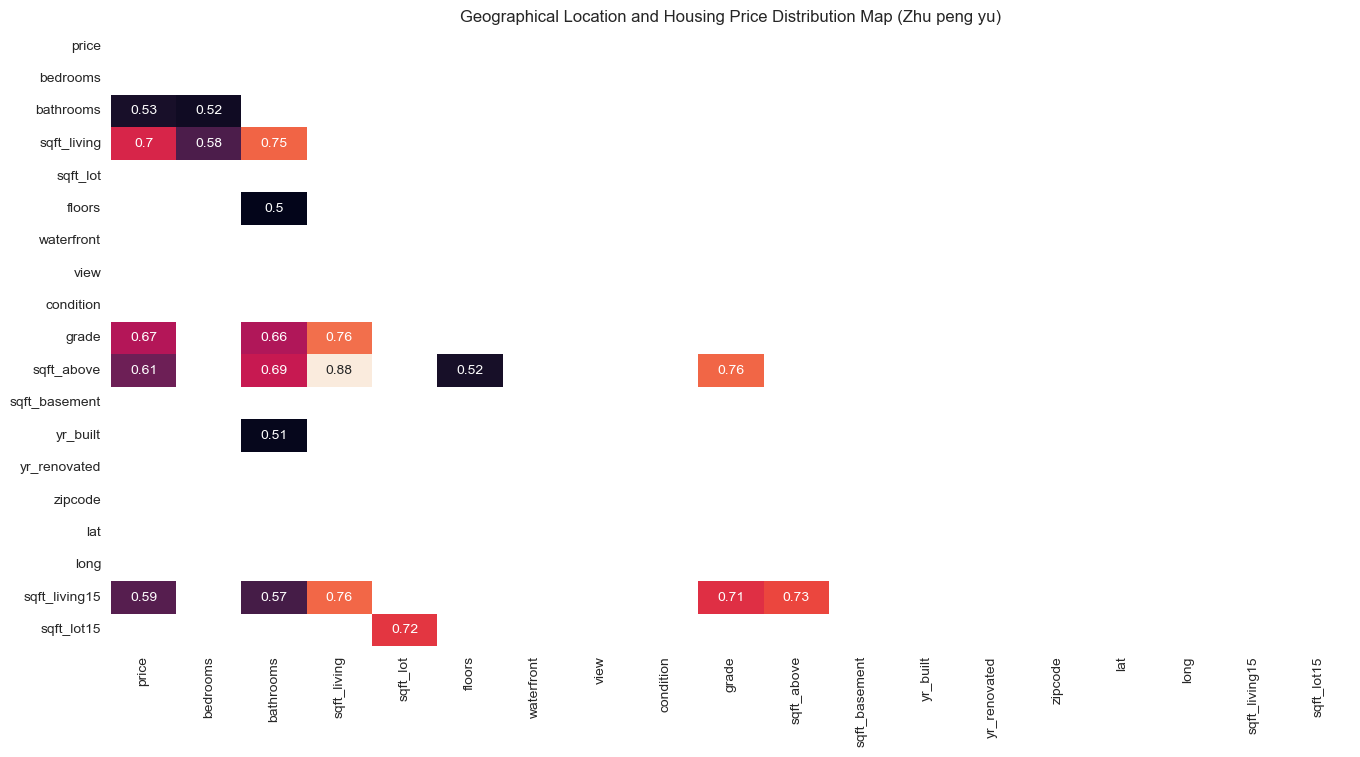

In [13]:
from pylab import *
%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.figure(figsize=(16,8))
mask = np.zeros_like(corr[corr>=.5],dtype=bool)
# Create a msk to draw only lower diagonal corr map
mask[np.triu_indices_from(mask)] = True
sns.set_style(style="white")
sns.heatmap(corr[corr>=.5],annot=True,mask=mask,cbar=False)
plt.title("Geographical Location and Housing Price Distribution Map (Zhu peng yu)")
plt.savefig('地理位置与房价分布图.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

#### 4.2.9 分析邮编与房价的分布关系

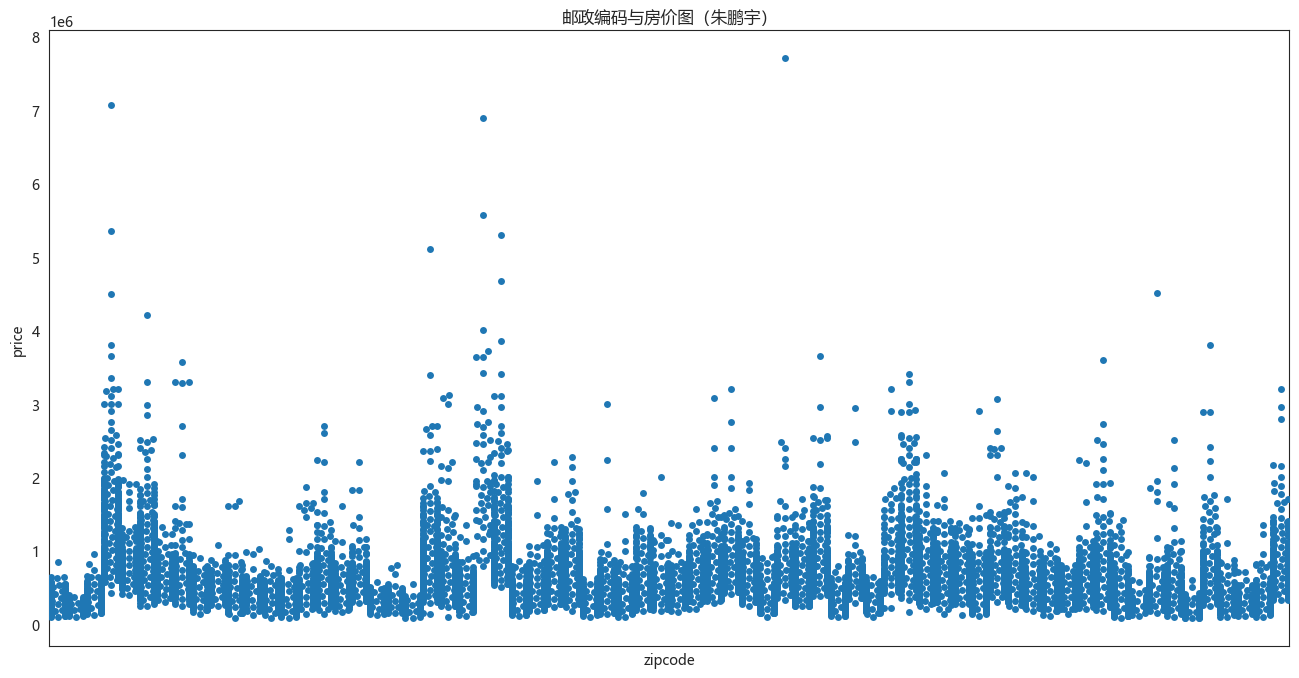

In [14]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#绘制各区域具体的价格散点分布情况，了解每个区域的价格分布区间
plt.figure(figsize=(16,8))
sns.swarmplot(x=df.zipcode, y=df.price)
plt.xticks([])
plt.title("邮政编码与房价图（朱鹏宇）")
plt.savefig('邮政编码与房价图.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()


##### 从图中可以看出，部分地区的房价跨度较大，有些地区房价比较便宜，因此邮编也是影响房价重要的因素。价格普遍集中在100~200万附近，且100万左右占大多数，表明价格数据分布存在倾斜的情况，高价格房屋的价格赞比较少。但实际规律无法直观体现，需要采用数据挖掘算法进行建模分析。


### 5. 模型训练数据处理
##### <font color=#DC143C>由于本案例是依据房屋的属性信息对房屋的价格进行预测，预测的是连续变量，因此这里主要采用回归模型进行预测。在回归模型中最常用的算法有线性回归，随机森林，GBDT，KNN，决策树等模型，这里首先采用线性回归进行数据分析。</font>

#### 5.1 配置训练数据与测试数据

In [15]:
#使用线性回归模型进行数据分析
from sklearn.linear_model import LinearRegression

X = df.drop(['price','long'],axis=1)
X = X.values
y = df['price']
#导入数据拆分算法train_test_split进行数据集的拆分
from sklearn.model_selection import train_test_split
#将数据拆分为训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#### 5.2 数据标准化处理
##### <font color=#DC143C>由于不同属性之间，区间范围差异较大，因此这里对属性特征进行标准化操作。</font>

In [16]:
#调用数据标准化模块
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
#对训练数据属性集进行标准化处理
X_train= sc.transform(X_train)
#对测试数据属性集进行标准化处理
X_test = sc.transform(X_test)

### 6. 数据建模分析

#### 6.1 采用线性回归建立回归模型

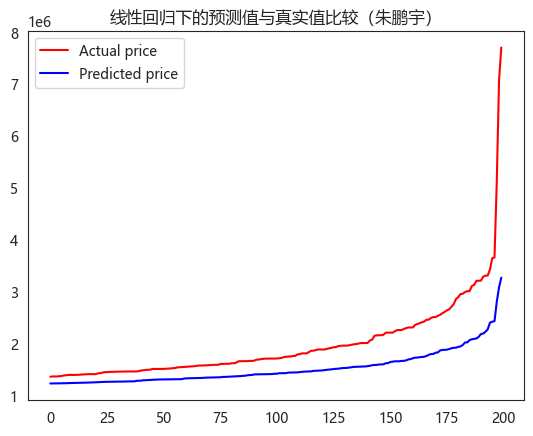

0.7066729831195535


In [17]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#采用线性回归进行模型训练
model.fit(X_train, y_train)
#let us predict
#获取模型预测结果
y_pred=model.predict(X_test)

y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='r',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("线性回归下的预测值与真实值比较（朱鹏宇）")
plt.legend()
plt.savefig('线性回归下的预测值与真实值比较.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

#打印模型评分结果
print (model.score(X_test, y_test))


##### <font color=#DC143C>模型评估值反映的是模型的整体预测效果，该值的取值范围是[0,1]，模型评估值越接近1表示模型越好，此处模型评估值为0.71，该值不是很大，表明模型效果不是特别理想。</font>

#### 6.2 采用随机森林建立回归模型

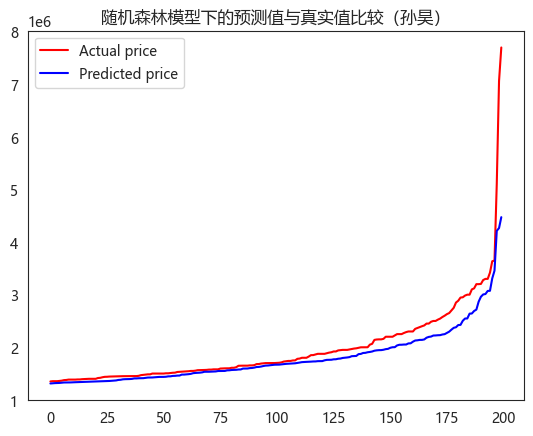

0.8659387335027869


In [18]:
from sklearn.ensemble import RandomForestRegressor 
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
model = RandomForestRegressor(n_estimators=500)
#配置模型中回归树的个数为500
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#可视化
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='r',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("随机森林模型下的预测值与真实值比较（孙昊）")
plt.legend()
plt.savefig('随机森林模型下的预测值与真实值比较.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()


print (model.score(X_test, y_test))

#### 6.3 采用梯度提升树建立回归模型

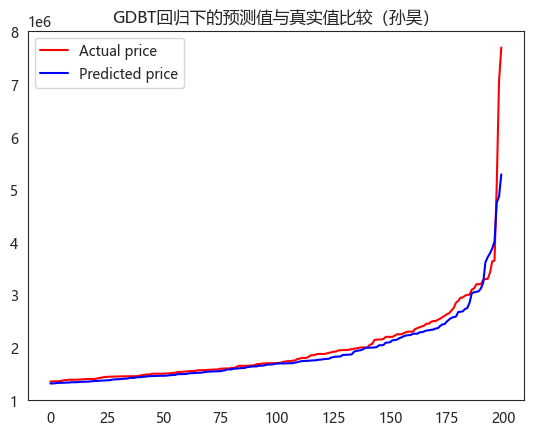

0.8860513625943682


In [19]:
#导入相关库
from sklearn.ensemble import GradientBoostingRegressor
#配置GBDT回归模型的分类器个数
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
model = GradientBoostingRegressor(n_estimators=500)
model.fit(X_train, y_train)
#采用测试数据集进行模型预测
y_pred=model.predict(X_test)

#可视化
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='r',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("GDBT回归下的预测值与真实值比较（孙昊）")
plt.legend()
plt.savefig('GDBT回归下的预测值与真实值比较.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()


print (model.score(X_test, y_test))



#### 6.4 采用最近邻算法建立回归模型

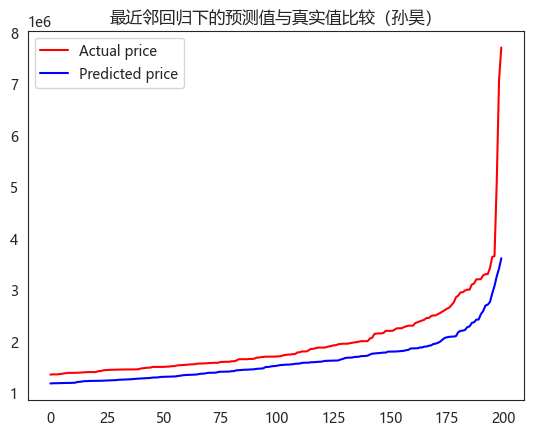

0.7798156448526693


In [20]:
from sklearn.neighbors import KNeighborsRegressor
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#配置最近邻回归模型参数
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#可视化
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='r',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("最近邻回归下的预测值与真实值比较（孙昊）")
plt.legend()
plt.savefig('最近邻回归下的预测值与真实值比较.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

print (model.score(X_test, y_test))

##### 上述结果显示，最近邻回归模型预测结果相对较差。

#### 6.5 采用决策树建立回归模型

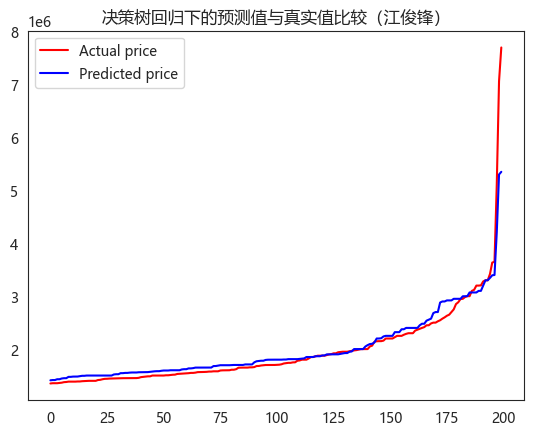

0.6991856323196659


In [21]:
from sklearn.tree import DecisionTreeRegressor
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#可视化
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='r',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("决策树回归下的预测值与真实值比较（江俊锋）")
plt.legend()
plt.savefig('决策树回归下的预测值与真实值比较.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

print (model.score(X_test, y_test))

### 7. 尝试新模型

#### 7.1 ElasticNet回归

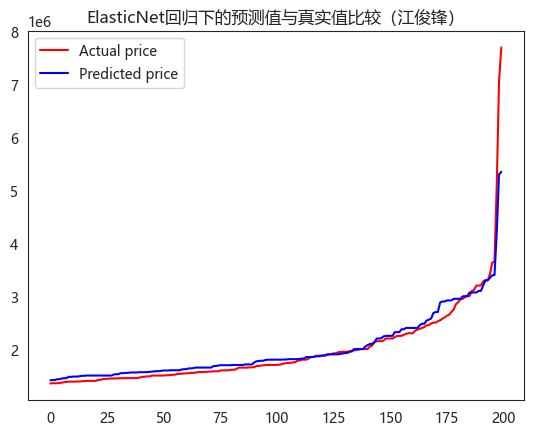

0.7065252848719912


In [22]:
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from sklearn.metrics import r2_score
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
model_EN=ElasticNet(0.01)  #实例化弹性网络回归对象
model_EN.fit(X_train,y_train) #训练
y_pred=model.predict(X_test)

#可视化
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='r',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("ElasticNet回归下的预测值与真实值比较（江俊锋）")
plt.legend()
plt.savefig('ElasticNet回归下的预测值与真实值比较.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

print(model_EN.score(X_test,y_test))

#### 7.2 lasso回归

0.5536375102527313


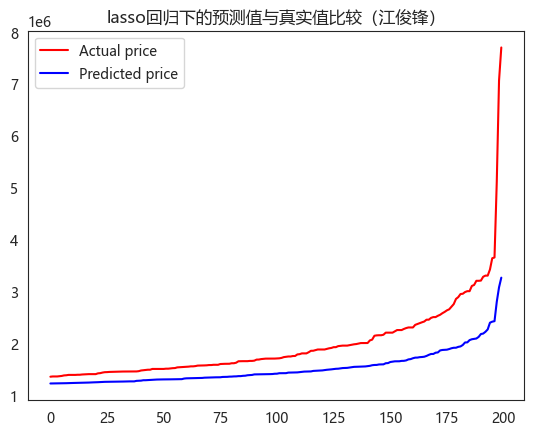

0.7066727186020882


In [23]:
la = Lasso()
la.fit(X_train, y_train)#拟合
y_pred=la.predict(X_test) #预测
#评价
print(r2_score(y_pred,y_test))
#print("mse=",mean_squared_error(y_test, y_pred))#均方误差
y_predt=la.predict(X_train)  #查看训练集上的效果

#可视化
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='r',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("lasso回归下的预测值与真实值比较（江俊锋）")
plt.legend()
plt.savefig('lasso回归下的预测值与真实值比较.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

print(la.score(X_test,y_test))

#### 7.3 贝叶斯岭回归

0.5531573340165397


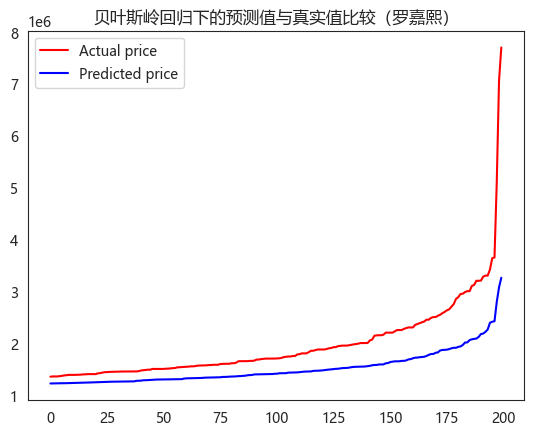

0.7066474538274907


In [24]:
from sklearn.linear_model import  BayesianRidge
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
Brd=BayesianRidge()
Brd.fit(X_train,y_train)
y_pred=Brd.predict(X_test)
print(r2_score(y_pred,y_test))
y_predt=Brd.predict(X_train)

y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='r',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("贝叶斯岭回归下的预测值与真实值比较（罗嘉熙）")
plt.legend()
plt.savefig('贝叶斯岭回归下的预测值与真实值比较.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

print(Brd.score(X_test,y_test))

#### 7.4 LightGBM回归模型

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2083
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 17
[LightGBM] [Info] Start training from score 541037.277150
R2 Score: 0.8685441775125069


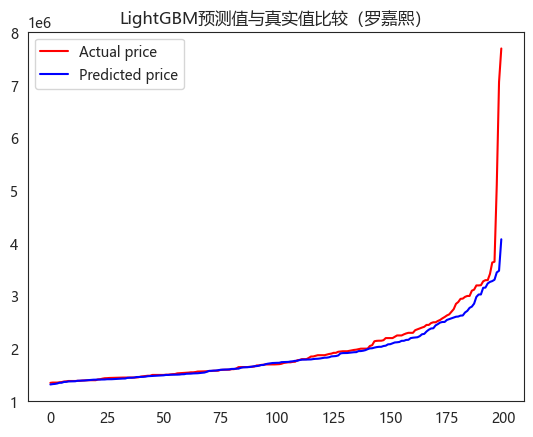

Model Score: 0.8685441775125069


In [25]:
import lightgbm as lgb
from sklearn.metrics import r2_score

# 创建LightGBM回归模型
lgb_model = lgb.LGBMRegressor()

# 拟合训练数据
lgb_model.fit(X_train, y_train)

# 预测测试集
y_pred = lgb_model.predict(X_test)

# 计算R2得分
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# 预测训练集
y_pred_train = lgb_model.predict(X_train)

# 绘制预测结果和实际结果的对比曲线
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.plot(sorted(y_test)[-200:], color='r', label="Actual price")
plt.plot(sorted(y_pred)[-200:], color='b', label="Predicted price")
plt.title("LightGBM预测值与真实值比较（罗嘉熙）")
plt.legend()
plt.savefig('LightGBM预测值与真实值比较.png', dpi=500, bbox_inches='tight')
plt.show()

# 打印模型在测试集上的得分
score = lgb_model.score(X_test, y_test)
print("Model Score:", score)

**对LightGBM回归模型进行超参数优化**

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM] [Info] Number of data points in the train set: 12104, number of used features: 17
[LightGBM] [Info] Start training from score 542982.974884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539782.552342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 538522.588532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 539906.676031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 12103, number of used features: 17
[LightGBM] [Info] Start training from score 543991.433198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

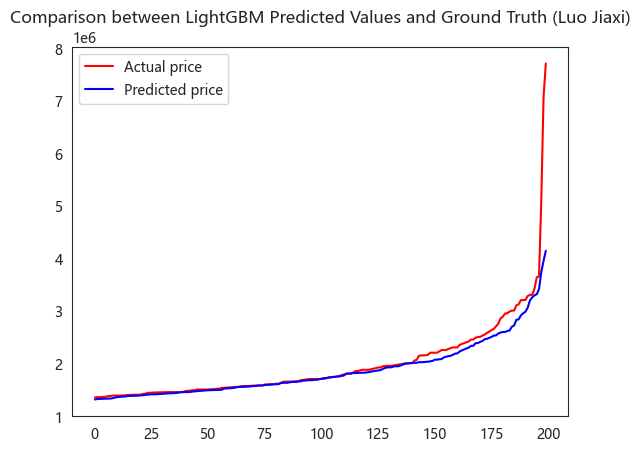

In [26]:
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# 定义LightGBM回归模型
lgb_model = lgb.LGBMRegressor()

# 定义超参数空间
param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='r2')

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和对应得分
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# 使用最佳参数的模型进行训练和预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 计算R2得分
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# 绘制预测结果和实际结果的对比曲线
plt.plot(sorted(y_test)[-200:], color='r', label="Actual price")
plt.plot(sorted(y_pred)[-200:], color='b', label="Predicted price")
plt.title("Comparison between LightGBM Predicted Values and Ground Truth (Luo Jiaxi)")
plt.legend()
plt.savefig('LightGBM预测值与真实值比较.png', dpi=500, bbox_inches='tight')
plt.show()

<font color=#DC143C>**因为该进行参数优化后并没有显著的提升，与梯度提升算法模型相比较之下，最终选择梯度提升算法模型**</font>

In [27]:
#配置梯度提升树模型参数，树的棵数
model = GradientBoostingRegressor(n_estimators=500)
#采用训练数据进行模型训练
model.fit(X_train, y_train)
#采用测试数据进行模型预测
y_predicted = model.predict(X_test)
#导入模型结果评估模块平均绝对误差，均方根误差和r2值
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#计算平均绝对误差，均方根误差，r2模型值
mean_absolute_error(y_test,y_predicted)
mean_squared_error(y_test,y_predicted)
r2_score(y_test,y_predicted)
#输出平均绝对误差，均方根误差，r2模型值
print(r2_score(y_test,y_predicted))
print(mean_absolute_error(y_test,y_predicted))
print(mean_squared_error(y_test,y_predicted))

0.887144234410381
69703.11936367983
15566580105.286108


#### 优化参数后的GDBT梯度提升树模型

#### <font color=#DC143C>因为优化参数耗时巨大，所以这里直接放入在优化过程中得到的最佳参数来展示最终优化的模型，优化过程呈现在报告中，优化代码在后面给出。</font>

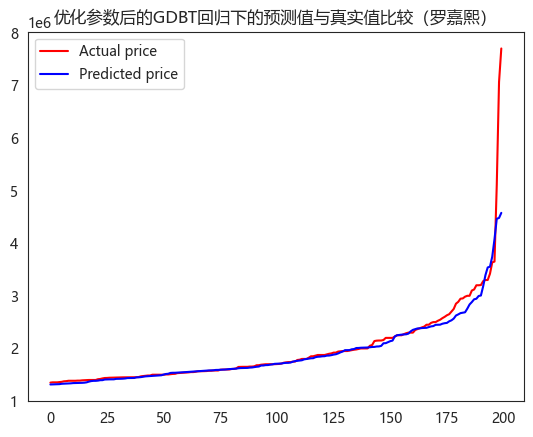

0.8791112929463114
68123.88833072144
16674591079.543478


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
#配置GBDT回归模型的分类器个数
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model_op = GradientBoostingRegressor(n_estimators=500,alpha=0.6,
loss='squared_error',min_samples_leaf=3,max_depth = 7,
min_samples_split = 100,max_features=13)
model_op.fit(X_train, y_train)
#采用测试数据集进行模型预测
y_predt=model_op.predict(X_test)

#可视化
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
y_t=sorted(y_test)
y_p=sorted(y_predt)
plt.plot(y_t[-200:],color='r',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("优化参数后的GDBT回归下的预测值与真实值比较（罗嘉熙）")
plt.legend()

plt.savefig('优化参数后的GDBT回归下的预测值与真实值比较.png', dpi=500, bbox_inches='tight') # 解决图片不清晰，不完整的问题
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#输出计算平均绝对误差，均方根误差，r2模型值



print (model_op.score(X_test, y_test))
print(mean_absolute_error(y_test,y_predt))
print(mean_squared_error(y_test,y_predt))

### 8. 超参数优化

#### 在测试集上的准确度和误差还有提升的空间，其可能出现过拟合现象。所以下面来调节其参数减小或者消除过拟合现象。

#### 8.1 loss 、min_samples_leaf、alpha参数调优

In [29]:
#使用随机搜素
model_gbr = GradientBoostingRegressor(n_estimators=500)
from sklearn.model_selection import RandomizedSearchCV
parameters1 = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
               'min_samples_leaf': [1,2,3,4,5],
              'alpha': [0.001 ,0.003, 0.01, 0.03, 0.1,0.3,0.6,0.9] }
gsearch1 = RandomizedSearchCV(estimator=model_gbr, param_distributions=parameters1, cv=5)
gsearch1.fit(X_train,y_train)
print('Best score is:', gsearch1.best_score_)
print('Best parameter is:', gsearch1.best_params_)

Best score is: 0.8782718660244552
Best parameter is: {'min_samples_leaf': 5, 'loss': 'squared_error', 'alpha': 0.9}


#### 8.2 max_depth和min_samples_split参数调优

In [ ]:
#使用网格搜素

from sklearn.model_selection import GridSearchCV
model_gbr = GradientBoostingRegressor(n_estimators=500,alpha=0.6,
loss='squared_error',min_samples_leaf=4)
parameters2 = {'max_depth':range(3,14,2), 'min_samples_split':range(100,801,200)}
gsearch2 = GridSearchCV(estimator=model_gbr, param_grid=parameters2,cv=5)
gsearch2.fit(X_train,y_train)
print('Best score is:', gsearch2.best_score_)
print('Best parameter is:', gsearch2.best_params_)

#### 8.3 min_samples_split和min_samples_leaf参数调优

In [ ]:
from sklearn.model_selection import GridSearchCV

model_gbr = GradientBoostingRegressor(n_estimators=500,alpha=0.6,
loss='squared_error',min_samples_leaf=4,max_depth=7)
parameter3 = {'max_depth':range(3,14,2), 'min_samples_split':range(100,801,200)}
gsearch3 = GridSearchCV(estimator=model_gbr, param_grid= parameter3,cv=5)
gsearch3.fit(X_train,y_train)

print('Best score is:', gsearch3.best_score_)
print('Best parameter is:', gsearch3.best_params_)

#### 8.4 max_features调优

In [ ]:
from sklearn.model_selection import GridSearchCV

model_gbr = GradientBoostingRegressor(n_estimators=500,alpha=0.6,
loss='squared_error',min_samples_leaf=3,max_depth=7,min_samples_split=100)
parameters4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator=model_gbr, param_grid= parameters4,cv=5)
gsearch4.fit(X_train,y_train)

print('Best score is:', gsearch4.best_score_)
print('Best parameter is:', gsearch4.best_params_)

#### 8.5 最终优化模型-GDBT梯度提升树回归模型

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=500,alpha=0.6,
loss='squared_error',min_samples_leaf=3,max_depth = 7,
min_samples_split = 100,max_features=13)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

#可视化
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
y_t=sorted(y_test)
y_p=sorted(y_pred)
plt.plot(y_t[-200:],color='r',label="Actual price")
plt.plot(y_p[-200:],color='b',label="Predicted price")
plt.title("优化后的GDBT回归下的预测值与真实值比较（罗嘉熙）")
plt.legend()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(model.score(X_test, y_test))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
